#### Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

###### The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
from pyforest import *

In [5]:
train = pd.read_csv("~/Downloads/train_kOBLwZA.csv")
test = pd.read_csv("~/Downloads/test_t02dQwI.csv")

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Univariate Analysis

C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


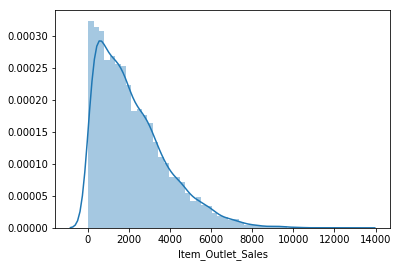

In [8]:
# Item Outlet Sales
sns.distplot(train.Item_Outlet_Sales)

In [9]:
# Statistics

train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### Base Model - Average | RMSE 1773 Dollars

In [10]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})

In [11]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [14]:
solution.to_csv("Base Model.csv", index = False) # 1773.82

In [15]:
cd

C:\Users\PGPMEX-Mumbai-GL


### Combining the Datasets

In [16]:
combined = pd.concat([train,test], sort = False, ignore_index=True)

In [17]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Univariate Analysis - Numerical Columns

1. Target Variable, Item Visibility appears skewed in nature.

2. Item Weight has 04 different data dist.

3. No pattern saw in Item Weight

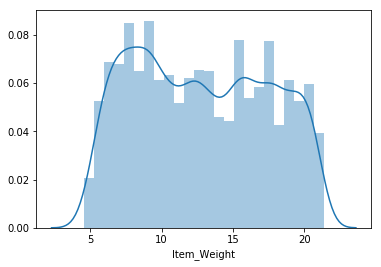

In [22]:
sns.distplot(combined.Item_Weight.dropna()) # Item Weight

# Inf: Item Weight does not show any particular shape

C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


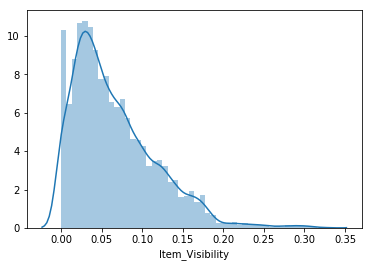

In [21]:
# Item Visibility
sns.distplot(combined.Item_Visibility)

# Inf - Visibility is skewed meaning that some items having higer visibility
# in comparison to others.

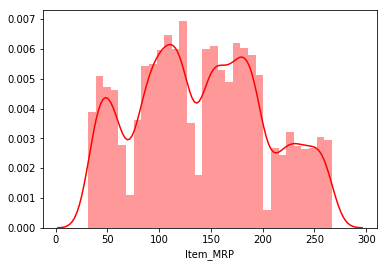

In [25]:
# Item MRP
sns.distplot(combined.Item_MRP, color = "red")

# Inf - 04 diff dist are visible. Need to explore further

### Univariate Analysis - Categorical Variables

In [26]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    4824
reg         195
Name: Item_Fat_Content, dtype: int64

In [30]:
# Replace the LF, low fat into Low Fat
combined.Item_Fat_Content.replace(to_replace = ["LF", "low fat"],
                                 value = ["Low Fat"]*2, inplace = True)

In [33]:
combined.Item_Fat_Content.replace(to_replace = "reg",
                                 value = "Regular", inplace = True)

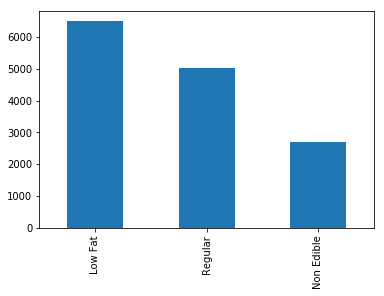

In [143]:
combined.Item_Fat_Content.value_counts().plot(kind = "bar")

#Inf: Low Fat Items Sell More than Regular

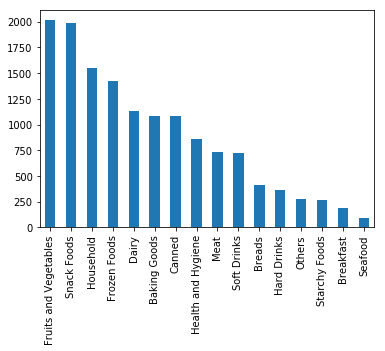

In [36]:
combined.Item_Type.value_counts().plot(kind = "bar")

# Inf: Top 05 Items are Fruits and veggies, Snacks, 
# Household, Frozen Food and Dairy

In [43]:
# Outlet ID
combined.Outlet_Identifier.value_counts()

# Inf: Top 02 Outlets: OUT27 & OUT 13
# Inf: Bottom 2: OUT 10 and Out 19

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [40]:
# Outlet Size
combined.Outlet_Size.value_counts()
# Medium Outlets are Performing Better than the Rest.

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [42]:
combined.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()

# Inf: Out13 is a High Outlet
# Inf: Out27 is a Medium Size Outlet

Outlet_Size  Outlet_Identifier
High         OUT013               1553
Medium       OUT027               1559
             OUT049               1550
             OUT018               1546
Small        OUT035               1550
             OUT046               1550
             OUT019                880
Name: Outlet_Identifier, dtype: int64

In [44]:
combined.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [45]:
combined.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

### Bivariate Analysis - Numerical vs Numerical

Scatterplot

In [47]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


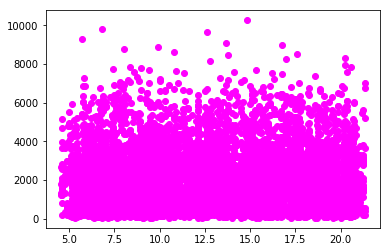

In [48]:
# Item Weight vs Sales
plt.scatter(combined.Item_Weight, 
            combined.Item_Outlet_Sales, color = "magenta")

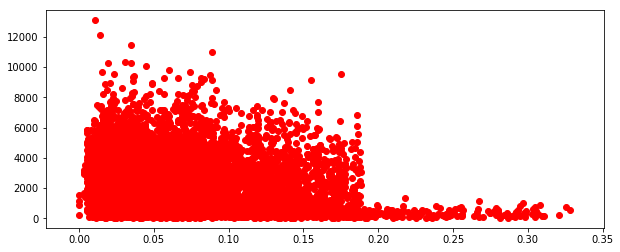

In [106]:
# Item Weight vs Sales
plt.figure(figsize = [10,4])
plt.scatter(combined.Item_Visibility, 
            combined.Item_Outlet_Sales, color = "red")

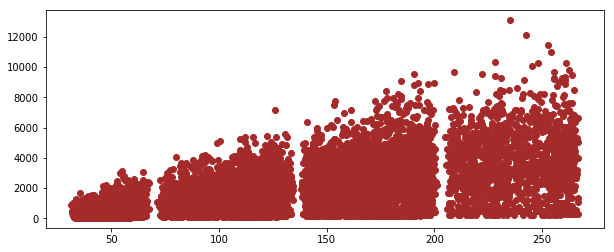

In [53]:
# Item Weight vs Sales
plt.figure(figsize = [10,4])
plt.scatter(combined.Item_MRP, 
            combined.Item_Outlet_Sales, color = "brown")

# Inf - MRP is combined and consolidated

### Bivariate Analysis - Categorical vs Numerical

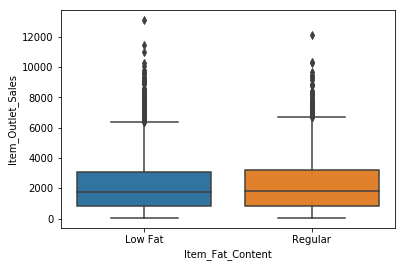

In [54]:
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = combined)

In [56]:
combined.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


### Missing Values Treatment

In [70]:
combined.isnull().sum()[combined.isnull().sum()!=0]

# Item Visibility is 0

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [68]:
combined.drop(["new_weight","Item_weight"], axis = 1, inplace = True)

In [64]:
combined.loc[combined.Item_Identifier=="FDP10", "new_weight"]

7        19.0
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327    19.0
Name: new_weight, dtype: float64

In [69]:
combined["Item_Weight"]=combined.groupby("Item_Identifier")
["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [85]:
# Outlet Size
combined[combined.Outlet_Size.isnull()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [ ]:
# S1 and Grocery Store
# T3 and T2

# Gstore is in S1 and Small & S1 is T1 and Medium

In [77]:
combined.groupby(["Outlet_Type", "Outlet_Location_Type"])["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           880
Supermarket Type1  Tier 1                Medium         1550
                                         Small          1550
                   Tier 2                Small          1550
                   Tier 3                High           1553
Supermarket Type2  Tier 3                Medium         1546
Supermarket Type3  Tier 3                Medium         1559
Name: Outlet_Size, dtype: int64

In [88]:
# For Grocery Store
combined[combined.Outlet_Type=="Grocery Store"]
["Outlet_Location_Type"].unique()

array(['Tier 3', 'Tier 1'], dtype=object)

In [94]:
combined.loc[(combined.Outlet_Type=="Grocery Store") 
             &(combined.Outlet_Location_Type=='Tier 3'),
            "Outlet_Size"] = "Small"

In [101]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Size"]="Medium"

In [102]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Item Visibility

In [105]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")
["Item_Visibility"].transform(lambda x:x.replace(0, x.median()))

In [107]:
combined[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
651,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,46.5402,OUT010,1998,Small,Tier 3,Grocery Store,229.7010
4208,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.9402,OUT027,1985,Medium,Tier 3,Supermarket Type3,872.8638
4791,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.2402,OUT018,2009,Medium,Tier 3,Supermarket Type2,1148.5050
12966,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,44.1402,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
13259,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [116]:
a=combined[(combined.Item_Fat_Content=="Low Fat") &
         (combined.Item_Weight==11.8) &
             (combined.Item_Type=="Fruits and Vegetables")]
["Item_Visibility"].mean()

0.07427036499999999

In [114]:
combined.loc[combined.Item_Visibility==0, "Item_Visibility"] = a

### Feature Engineering

1. Outlet Vintage

2. Item ID - Identifier 1:2 letters

3. Price Per Unit = MRP/Weight

4. Item Type - Categorize as Perishable and  Non Perishables

5. Where it is Household in Item Type, Item Fat Content - Non Edible

6. Outlet ID to be converted in High Performance, Medium Performance and Low Performance - Takes Sales into Consideration to create cats

In [118]:
combined["Outlet_Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [119]:
combined["Price_PerUnit"] =combined.Item_MRP/combined.Item_Weight 

In [126]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [121]:
perishables = ['Dairy','Meat','Fruits and Vegetables',
               'Breakfast','Breads', 'Seafood']

In [122]:
def itemcat(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")

In [124]:
combined["Item_TypeCat"] = combined.Item_Type.apply(itemcat)

In [129]:
str(combined.Item_Identifier[0])[:2]

'FD'

In [130]:
idlist = []
for i in combined.Item_Identifier:
    idlist.append(str(i)[:2])
    
# combined.Item_Identifier.str[:2]

In [135]:
combined["Item_Id"] = pd.Series(idlist)

In [138]:
combined.Item_Id.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [142]:
combined.loc[combined.Item_Id=='NC', "Item_Fat_Content"]="Non Edible"

In [144]:
combined.Outlet_Vintage.describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Vintage, dtype: float64

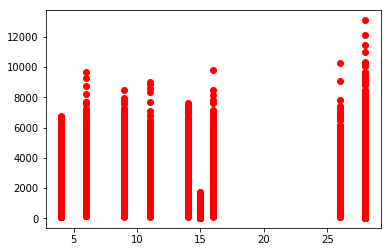

In [145]:
plt.scatter(combined.Outlet_Vintage, combined.Item_Outlet_Sales, color = "red")

* 0-5 years: New Outlets
* 5-10 Years: Medium Aged Outlets
* 10 - 15: Premium Outlets
* Above 15: Signature Outlets

In [149]:
def outletcat(x):
    if(x>15):
        return("Signature Outlets")
    elif(x>=10):
        return("Premuim Outlets")
    elif(x>=5):
        return("Medium Age Outlets")
    else:
        return("Small Outlets")

In [150]:
combined["Vintage_Cat"] = combined.Outlet_Vintage.apply(outletcat)

In [153]:
combined.Vintage_Cat.value_counts()

Signature Outlets     5542
Premuim Outlets       4023
Medium Age Outlets    3093
Small Outlets         1546
Name: Vintage_Cat, dtype: int64

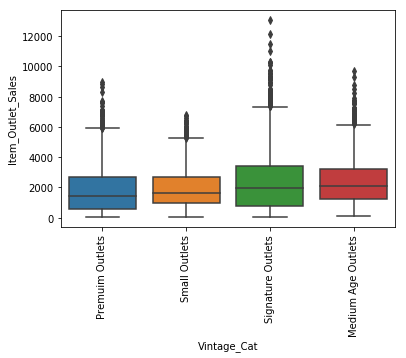

In [157]:
sns.boxplot(x = "Vintage_Cat", y = "Item_Outlet_Sales", data = combined)
plt.xticks(rotation = 90)
plt.show()

In [166]:
# Outlet vS Sales
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [169]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Price_PerUnit,Item_TypeCat,Item_Id,Vintage_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,26.861204,Perishables,FD,Premuim Outlets
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,8.153581,Non Perishables,DR,Small Outlets
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,8.092457,Perishables,FD,Premuim Outlets
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,9.484115,Perishables,FD,Premuim Outlets
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,6.031512,Non Perishables,NC,Signature Outlets


In [167]:
# Outlet Category
def outcat(x):
    if(x=="OUT027"):
        return("High Sales Outlet")
    elif((x=="OUT010")| (x=="OUT019")):
        return("Low Sales Outlet")
    else:
        return("Medium Sales Outlet")

In [170]:
combined["Outlet_Cat"] = combined.Outlet_Identifier.apply(outcat)

In [173]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Vintage', 'Price_PerUnit',
       'Item_TypeCat', 'Item_Id', 'Vintage_Cat', 'Outlet_Cat'],
      dtype='object')

In [174]:
newcombined = combined.drop(['Item_Identifier',
                             'Outlet_Identifier',
                             'Outlet_Establishment_Year'], axis = 1)

In [179]:
# Split the Data in Train and Test
newtrain = newcombined.loc[:train.shape[0]-1]

In [180]:
newtest = newcombined.loc[train.shape[0]:]

In [181]:
print(newtrain.shape)
print(newtest.shape)

(8523, 15)
(5681, 15)


In [182]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Price_PerUnit,Item_TypeCat,Item_Id,Vintage_Cat,Outlet_Cat
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,26.861204,Perishables,FD,Premuim Outlets,Medium Sales Outlet
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,8.153581,Non Perishables,DR,Small Outlets,Medium Sales Outlet
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,8.092457,Perishables,FD,Premuim Outlets,Medium Sales Outlet
3,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,15,9.484115,Perishables,FD,Premuim Outlets,Low Sales Outlet
4,8.93,Non Edible,0.013177,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,6.031512,Non Perishables,NC,Signature Outlets,Medium Sales Outlet


In [183]:
# Ohe
dummytrain = pd.get_dummies(newtrain)

In [185]:
newtest.drop('Item_Outlet_Sales', axis = 1, inplace = True)

C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [186]:
# Ohe
dummytest = pd.get_dummies(newtest)

In [187]:
dummytrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Vintage,Price_PerUnit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Id_DR,Item_Id_FD,Item_Id_NC,Vintage_Cat_Medium Age Outlets,Vintage_Cat_Premuim Outlets,Vintage_Cat_Signature Outlets,Vintage_Cat_Small Outlets,Outlet_Cat_High Sales Outlet,Outlet_Cat_Low Sales Outlet,Outlet_Cat_Medium Sales Outlet
0,9.30,0.016047,249.8092,3735.1380,14,26.861204,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,8.153581,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,17.50,0.016760,141.6180,2097.2700,14,8.092457,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,19.20,0.022914,182.0950,732.3800,15,9.484115,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,8.93,0.013177,53.8614,994.7052,26,6.031512,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [188]:
dummytest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Vintage,Price_PerUnit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Id_DR,Item_Id_FD,Item_Id_NC,Vintage_Cat_Medium Age Outlets,Vintage_Cat_Premuim Outlets,Vintage_Cat_Signature Outlets,Vintage_Cat_Small Outlets,Outlet_Cat_High Sales Outlet,Outlet_Cat_Low Sales Outlet,Outlet_Cat_Medium Sales Outlet
8523,20.750,0.007565,107.8622,14,5.198178,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8524,8.300,0.038428,87.3198,6,10.520458,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
8525,14.600,0.099575,241.7538,15,16.558479,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8526,7.315,0.015388,155.0340,6,21.193985,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8527,13.600,0.118599,234.2300,28,17.222794,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [189]:
# Scale the Dataset
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [191]:
a = sc.fit_transform(dummytrain.drop("Item_Outlet_Sales", axis = 1))

In [196]:
scaled_train = pd.DataFrame(a, columns = 
             dummytrain.columns[dummytrain.columns!="Item_Outlet_Sales"])

In [197]:
scaled_test = pd.DataFrame(sc.transform(dummytest), columns = 
             dummytest.columns)

### Decision Tree Classifier

In [198]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [200]:
pred_dtree = dtree.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)

In [201]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_dtree})

In [202]:
solution.to_csv("Dtree Model.csv", index = False) # 1591.1284129928015.

In [203]:
cd

C:\Users\PGPMEX-Mumbai-GL


In [211]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [212]:
pred_ada = ada.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_ada})

solution.to_csv("ADA Model.csv", index = False) # 1458

In [205]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
bagg = BaggingRegressor()
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()

In [206]:
pred_rf = rf.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)

pred_gbm = gbm.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)

pred_bagg = bagg.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [207]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_rf})

In [208]:
solution.to_csv("RF Model.csv", index = False) # 1252

In [209]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_bagg})

solution.to_csv("Bagging Model.csv", index = False) # 1258.054628207244

In [210]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_gbm})

solution.to_csv("GBM Model.csv", index = False) # 1155.7394027265873

In [215]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[("RF", rf),("GBM", gbm)])

In [216]:
pred_vr = vr.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_vr})

solution.to_csv("Voting Regressor Model.csv", index = False) # 1178

## XGBoost

In [218]:
from xgboost.sklearn import XGBRegressor

In [220]:
xgb = XGBRegressor()

In [221]:
pred_xgb = xgb.fit(scaled_train, 
                       dummytrain.Item_Outlet_Sales).predict(scaled_test)
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_xgb})

C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:16:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [222]:
solution.to_csv("XGB Regressor Model.csv", index = False) # 1154

In [223]:
xgbparams = {"booster":['gbtree', 'gblinear', 'dart'],
            "max_depth":[3,4,5,6],
            'learning_rate':[0.1, 0.3, 0.5],
            'n_estimators':[100,200, 500, 1000]}


In [225]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xgb, param_grid=xgbparams, cv = 5)

In [ ]:
grid.fit(scaled_train, dummytrain.Item_Outlet_Sales)

C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:25:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:25:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:25:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:25:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:25:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:27:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:27:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:28:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:29:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:29:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:29:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:30:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:30:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:31:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:31:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:31:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:32:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:34:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:34:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:34:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:34:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:35:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:35:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:36:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PGPMEX-Mumbai-GL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:37:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
